In [10]:
import pandas as pd
import seaborn as sns   
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('data.csv')
data.head(5)

,Unnamed: 0,State,Year,Rape,K&A,DD,AoW,AoM,DV,WT
0,0,ANDHRA PRADESH,2001,871,765,420,3544,2271,5791,7
1,1,ARUNACHAL PRADESH,2001,33,55,0,78,3,11,0
2,2,ASSAM,2001,817,1070,59,850,4,1248,0
3,3,BIHAR,2001,888,518,859,562,21,1558,83
4,4,CHHATTISGARH,2001,959,171,70,1763,161,840,0


In [4]:
data.isnull().sum()

Unnamed: 0    0
State         0
Year          0
Rape          0
K&A           0
DD            0
AoW           0
AoM           0
DV            0
WT            0
dtype: int64

In [5]:
data.describe()

,Unnamed: 0,Year,Rape,K&A,DD,AoW,AoM,DV,WT
count,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000,736.000000
mean,367.500000,2011.149457,727.855978,1134.542120,215.692935,1579.115489,332.722826,2595.078804,28.744565
std,212.609188,6.053453,977.024945,1993.536828,424.927334,2463.962518,806.024551,4042.004953,79.999660
min,0.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,183.750000,2006.000000,35.000000,24.750000,1.000000,34.000000,3.000000,13.000000,0.000000
50%,367.500000,2011.000000,348.500000,290.000000,29.000000,387.500000,31.000000,678.500000,0.000000
75%,551.250000,2016.000000,1069.000000,1216.000000,259.000000,2122.250000,277.500000,3545.000000,15.000000
max,735.000000,2021.000000,6337.000000,15381.000000,2524.000000,14853.000000,9422.000000,23278.000000,549.000000


In [6]:
data.columns

Index(['Unnamed: 0', 'State', 'Year', 'Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV',
       'WT'],
      dtype='object')

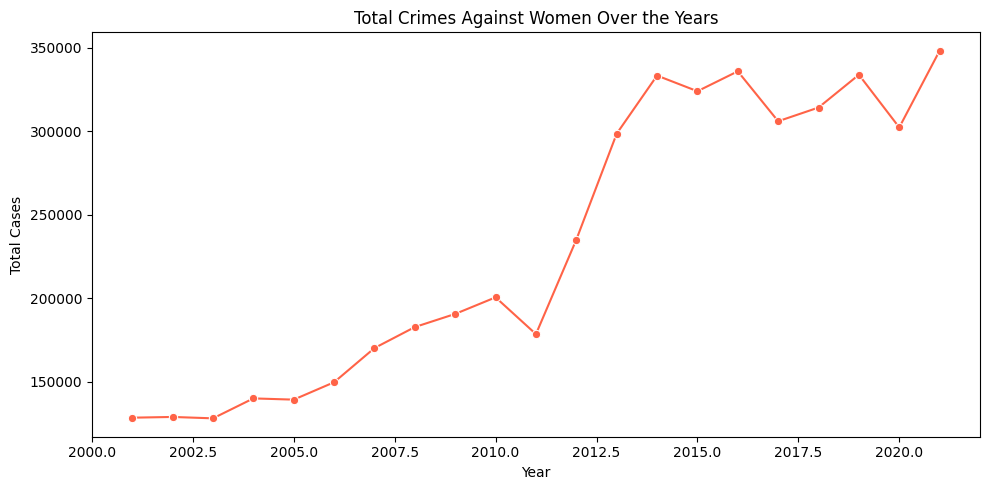

In [11]:
# 📊 Total cases per year (all types)
data['Total Crimes'] = data[['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']].sum(axis=1)

total_by_year = data.groupby('Year')['Total Crimes'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=total_by_year.index, y=total_by_year.values, marker='o', color='tomato')
plt.title("Total Crimes Against Women Over the Years")
plt.xlabel("Year")
plt.ylabel("Total Cases")
plt.tight_layout()
plt.show()


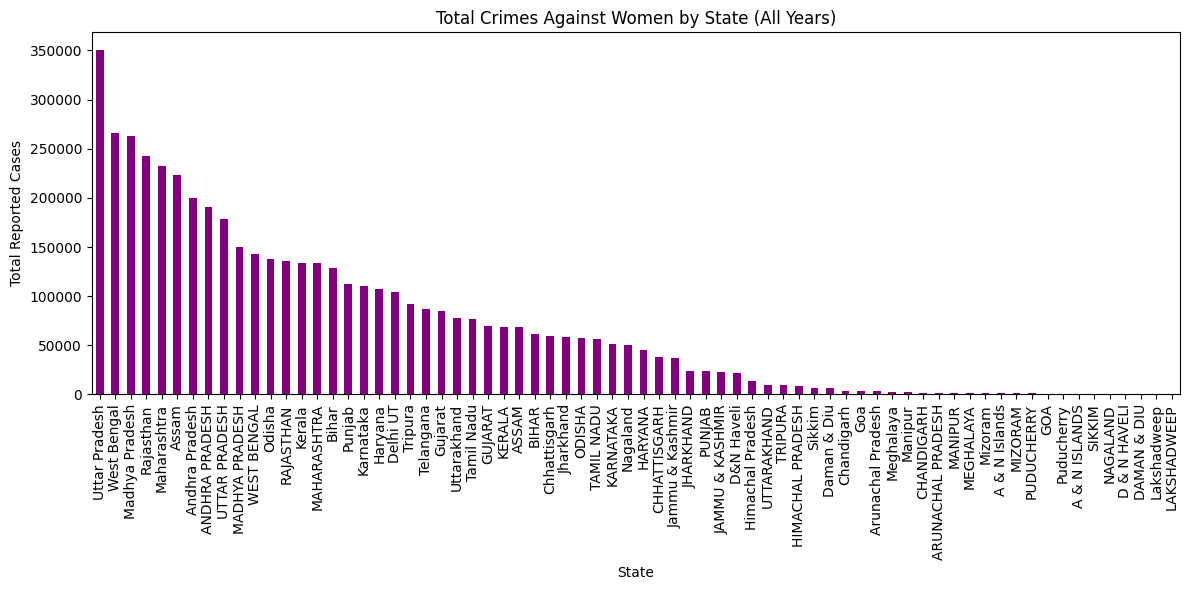

In [12]:
# 📍 Crimes by State (total of all years)
total_by_state = data.groupby('State')['Total Crimes'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,6))
total_by_state.plot(kind='bar', color='purple')
plt.title("Total Crimes Against Women by State (All Years)")
plt.xlabel("State")
plt.ylabel("Total Reported Cases")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


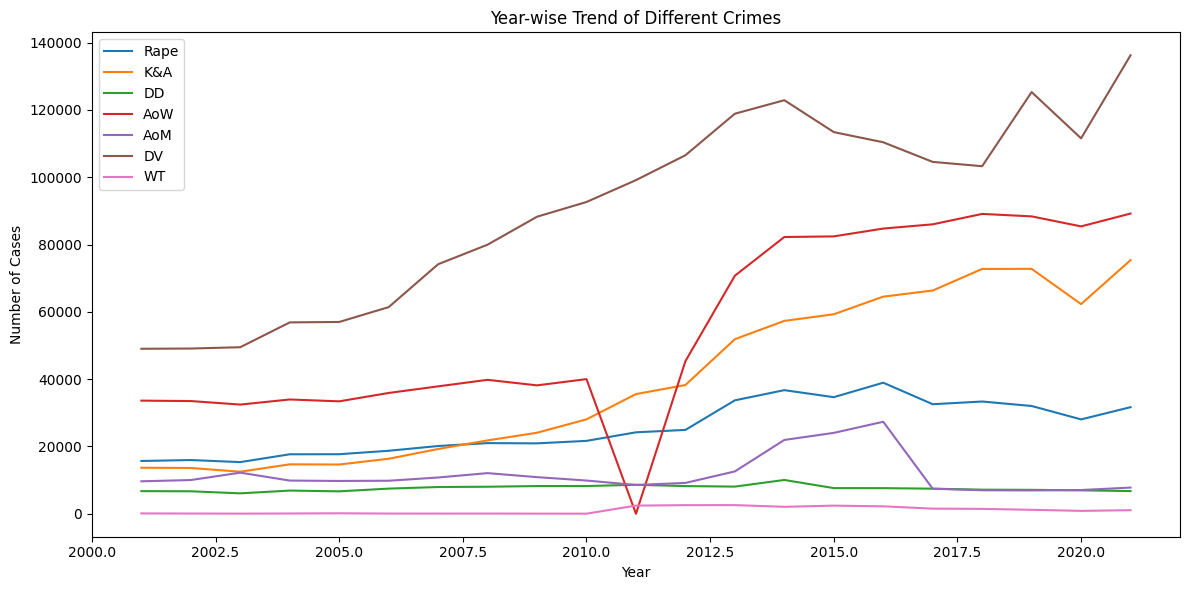

In [13]:
# 📈 Trend of individual crime types over years
crime_types = ['Rape', 'K&A', 'DD', 'AoW', 'AoM', 'DV', 'WT']
plt.figure(figsize=(12,6))

for crime in crime_types:
    trend = data.groupby('Year')[crime].sum()
    sns.lineplot(x=trend.index, y=trend.values, label=crime)

plt.title("Year-wise Trend of Different Crimes")
plt.xlabel("Year")
plt.ylabel("Number of Cases")
plt.legend()
plt.tight_layout()
plt.show()


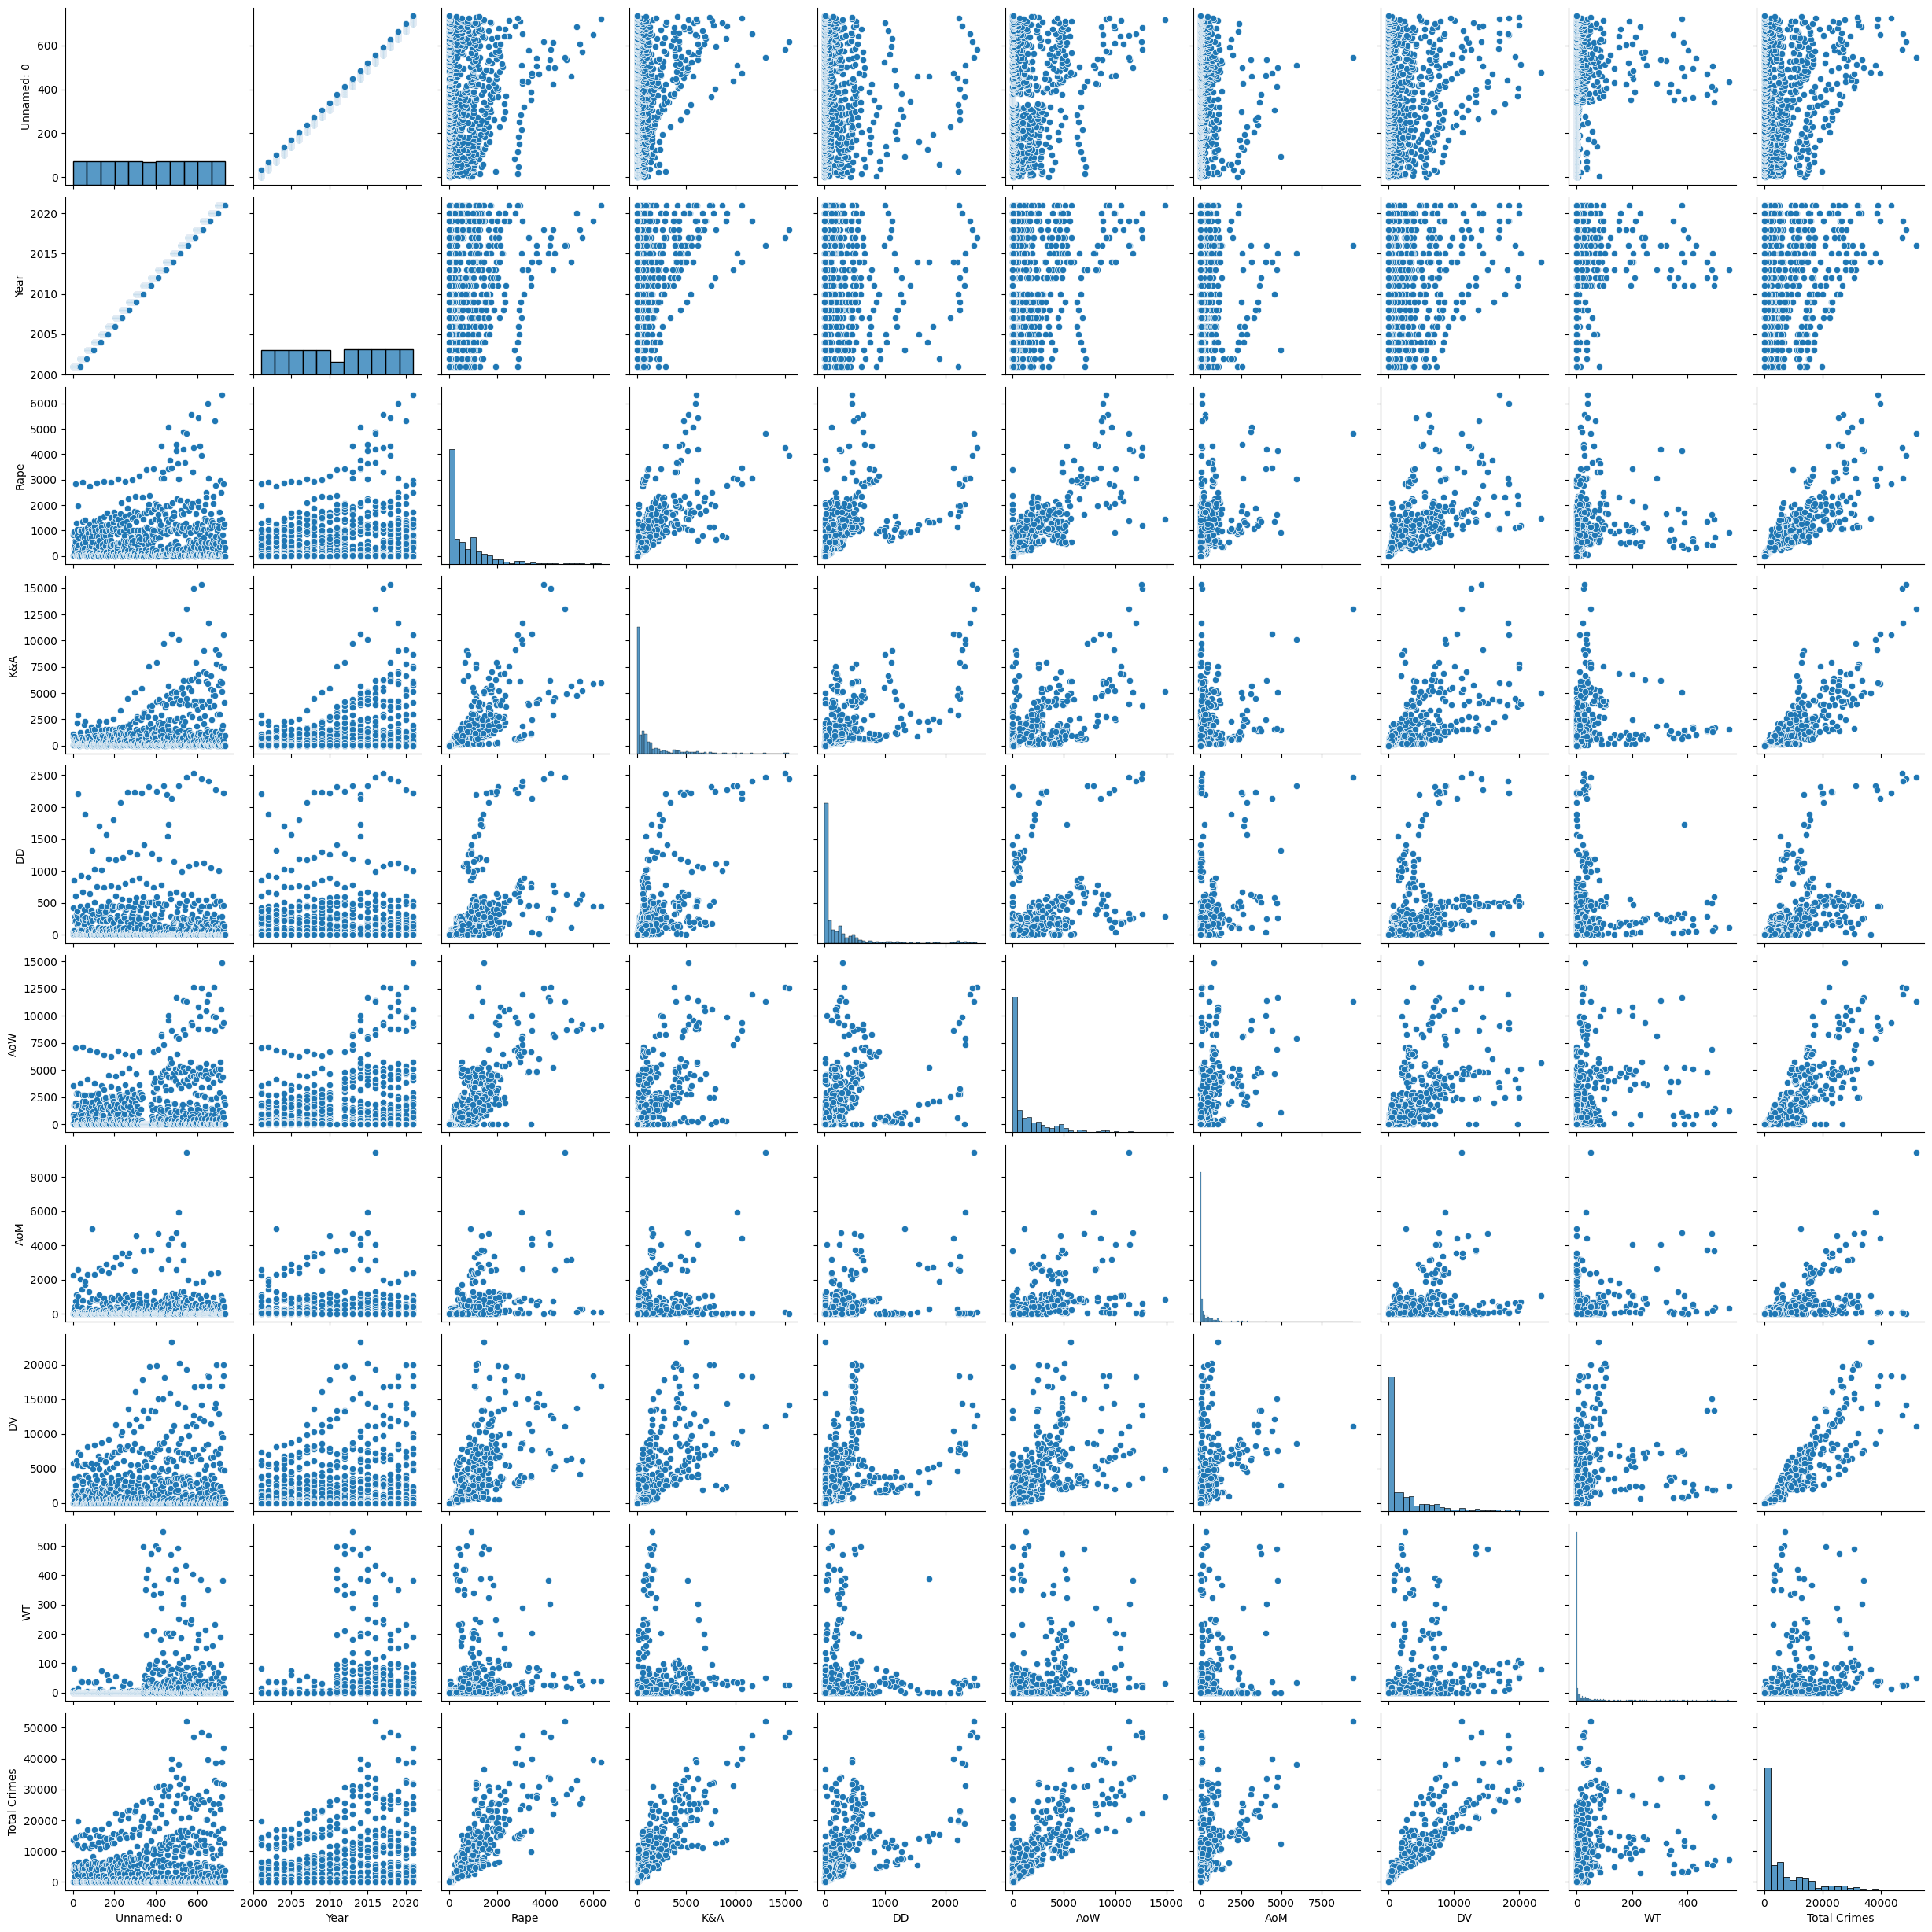

In [14]:
sns.pairplot(data=data)
plt.show()